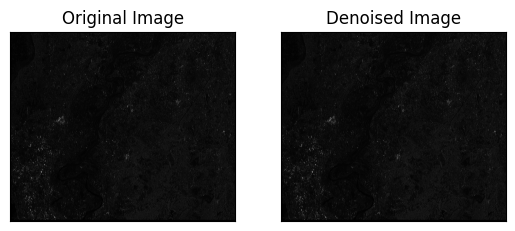

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("C:\\Users\\IDEAL COMPUTER S\\dip\\HH-ALPSRP236700520-H2.2_UA.tif", 0) 
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [2]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

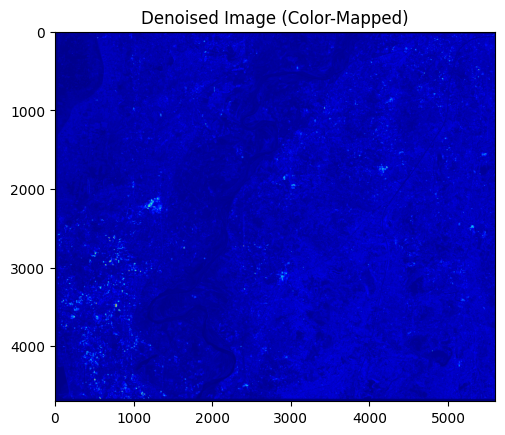

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread("C:\\Users\\IDEAL COMPUTER S\\dip\\HH-ALPSRP236700520-H2.2_UA.tif", 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

In [4]:
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread("C:\\Users\\IDEAL COMPUTER S\\dip\\HH-ALPSRP236700520-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 5.707772530395137


In [5]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread("C:\\Users\\IDEAL COMPUTER S\\dip\\HH-ALPSRP236700520-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9399758005740304


In [6]:
import cv2
import numpy as np

original_image = cv2.imread("C:\\Users\\IDEAL COMPUTER S\\dip\\HH-ALPSRP236700520-H2.2_UA.tif", 0) 

denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')


Original pixel value at (150, 150): 3
Denoised pixel value at (150, 150): 3


Original Image Amplitude (Magnitude):
[[ 521.         6346.29484387 4317.66332258 ... 4401.70680474
  4317.66332258 6346.29484387]
 [3594.03661794 4830.98587146 2024.99116988 ... 5228.63331646
  4813.58280375 8378.20561803]
 [4397.39042405 5514.15335675 2970.57155865 ... 3911.24576115
  2032.39820038 3294.30722836]
 ...
 [ 469.08465195 6547.44908391 4438.67626286 ... 2768.81501109
  6007.61754674 6949.45533645]
 [4397.39042405 3294.30722836 2032.39820038 ...  802.01450405
  2970.57155865 5514.15335675]
 [3594.03661794 8378.20561803 4813.58280375 ... 4102.53836195
  2024.99116988 4830.98587146]]
Denoised Image Amplitude (Magnitude):
[[ 118.          925.75206702  765.22186186 ...  940.24967012
   765.22186186  925.75206702]
 [ 510.92281909 3063.69638481 2047.42172532 ... 1682.68343503
   648.42222949 1143.91344739]
 [ 859.92866326 1418.67132114 1347.16398856 ... 1691.40424882
  1057.96790575 1621.72101259]
 ...
 [1296.22830784  724.15109802  509.28075494 ... 1342.68360874
  2016.5003717

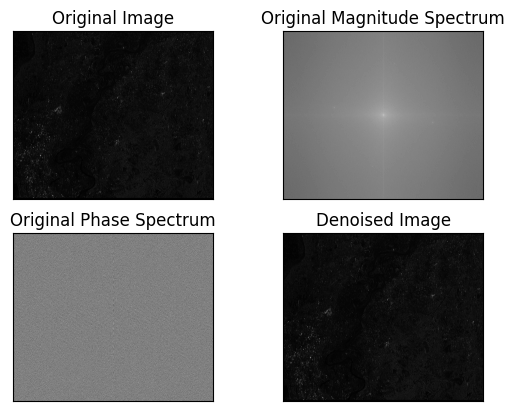

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread("C:\\Users\\IDEAL COMPUTER S\\dip\\HH-ALPSRP236700520-H2.2_UA.tif", 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)
    
     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")